In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#FOR OFFLINE PLOTTING
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [ ]:
tesla=pd.read_csv("C:/Users/chiku/Downloads/tesala.csv")
tesla

In [3]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [4]:
tesla['Date']=pd.to_datetime(tesla['Date'])

In [5]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total days={(tesla.Date.max() -tesla.Date.min()).days}days')

Dataframe contains stock prices between 2010-01-07 00:00:00 2019-12-03 00:00:00
Total days=3617days


In [6]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [7]:
tesla.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100


<AxesSubplot:>

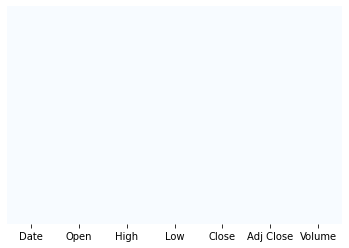

In [8]:
sns.heatmap(tesla.isnull(), yticklabels = False, cbar = False, cmap= 'Blues')

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>],
       [<AxesSubplot:title={'center':'Volume'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

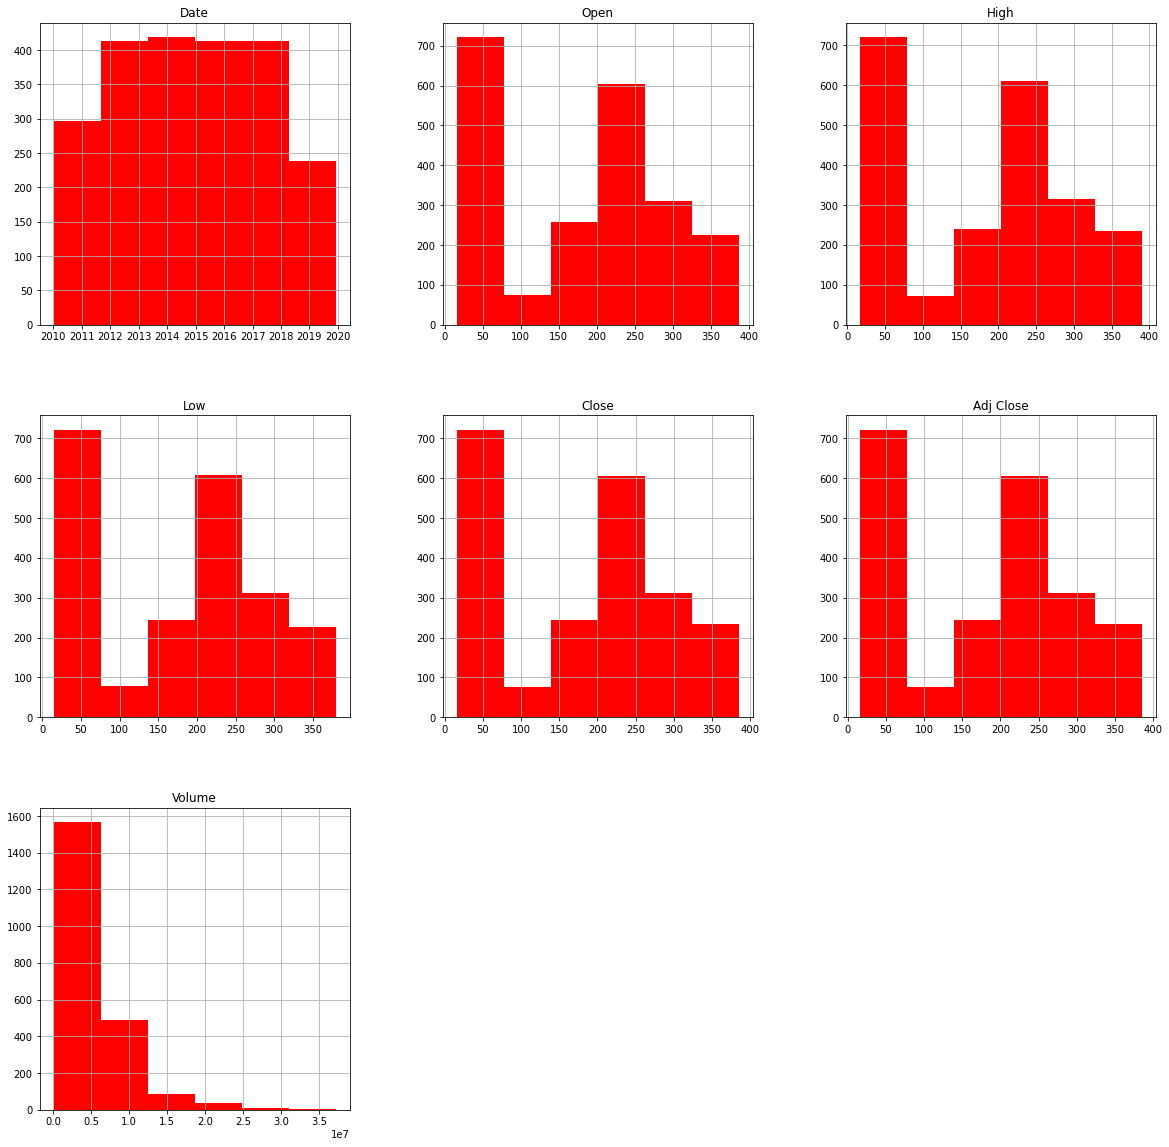

In [9]:
tesla.hist(bins=6, figsize =(20,20), color='r')

<AxesSubplot:>

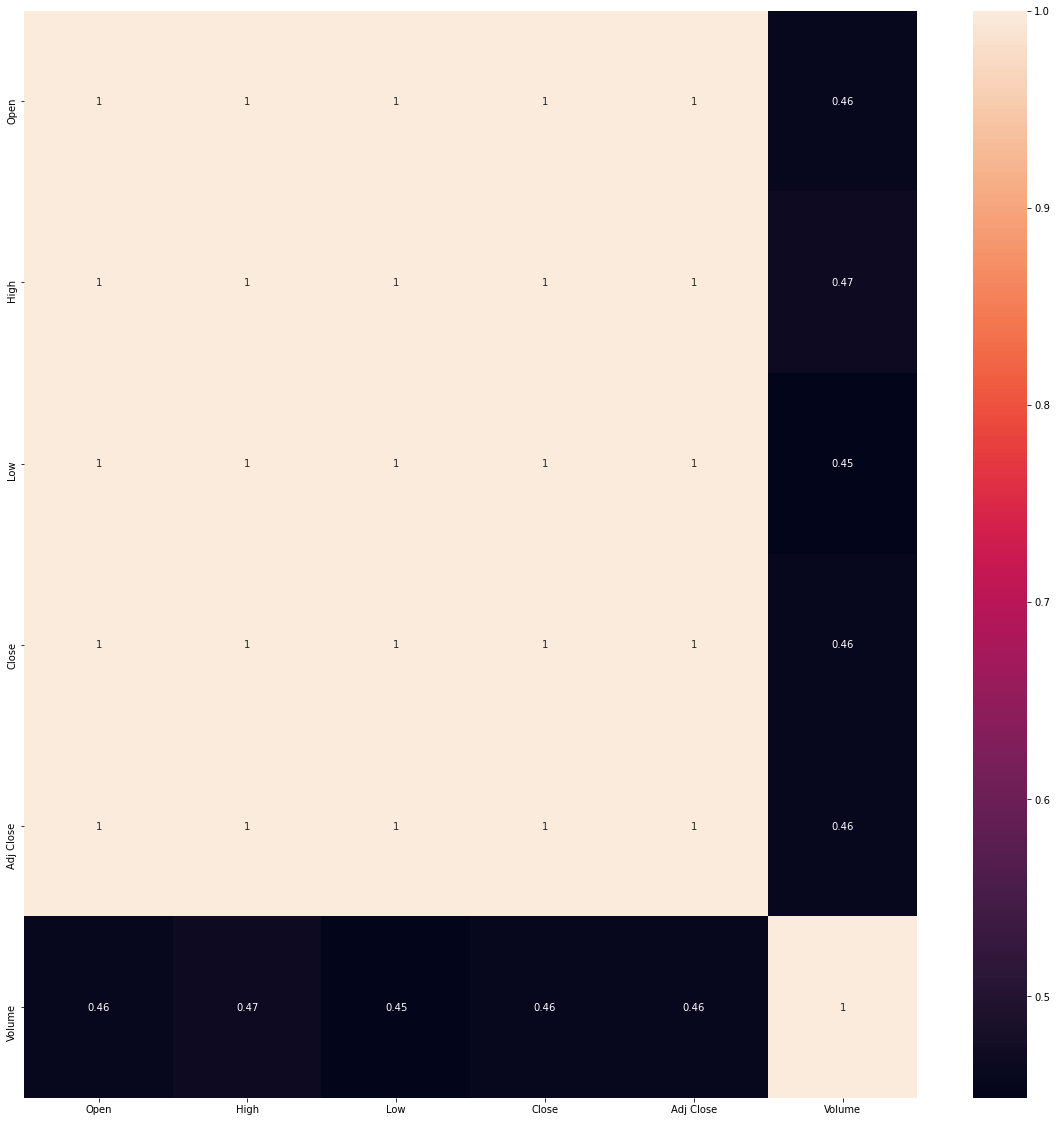

In [10]:
correlations = tesla.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)


In [11]:
tesla.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100


<AxesSubplot:>

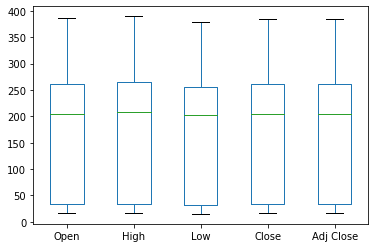

In [29]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')
#creating boxplot to check outliers

In [ ]:
#setting the layout for our plot
layout=go.Layout(title='Stock Prices of Tesla', xaxis=dict(title='Date',titlefont=dict(family='Courier New, monospace',size=18, color='#7f7f7f')),
                 yaxis=dict(title='Price',titlefont=dict(family='Courier New,monospace',size=18,color='#7f7f7f')))

tesla_data= [{'x':tesla['Date'],'y':tesla['Close']}]
plot=go.Figure(data=tesla_data,layout=layout)

In [42]:
#plot(plot) #plotting offline

fig = go.Figure(tesla_data)
fig.show()

In [ ]:
#Building the regression model

from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [46]:
#Split the data into train and test sets
X= np.array(tesla.index).reshape(-1,1)
Y= tesla['Close']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=101)

In [47]:
#Feature Scaling
scaler= StandardScaler().fit(X_train)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
#creating a linear model
lm=LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [50]:
#plot actual and predicted values for train dataset

trace0=go.Scatter(
x=X_train.T[0],
y=Y_train,
mode='markers',
name='Actual'
)
trace1=go.Scatter(
x=X_train.T[0],
y=lm.predict(X_train).T,
mode='lines',
name='Predicted'
)


tesla_data=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=tesla_data, layout=layout)


In [51]:
fig2 = go.Figure(tesla_data)
fig2.show()

In [ ]:
#Calculate scores for model evaluation

scores = f'''

{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}

{'r2_score'.ljust (10)} {r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict (X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''

print (scores)